<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Sampling_in_Python/Sampling_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Methods
Key four random sampling methods in Python: simple, systematic, stratified, and cluster.

## Big question

> what's sampling?

> why we need sampling?

# Simple random and systematic sampling

## import needed library and dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

attrition_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Sampling_in_Python/attrition.csv"
coffee_ratings_full_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Sampling_in_Python/coffee_ratings_full.csv"
spotify_2000_2020_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Sampling_in_Python/spotify_2000_2020.csv"

attrition_pop = pd.read_csv(attrition_url)
coffee_ratings_full = pd.read_csv(coffee_ratings_full_url)
spotify_2000_2020 = pd.read_csv(spotify_2000_2020_url)

## Exercise - Simple random sampling

The most basic form of sampling is **Simple Random Sampling (SRS)**. In this method, each row in the dataset has an equal probability of being selected. You’ll use this technique on a fictional employee dataset from IBM, where **"attrition"** refers to employees leaving the company.

You’ll sample 70 rows at random from the full dataset `attrition_pop`.

---

### Instructions

- Use `pd.sample()` to randomly select **70 rows** from `attrition_pop`.
- Set the `random_state` to `18900217` for reproducibility.
- Assign the result to a new DataFrame called `attrition_samp`.
- Print `attrition_samp` and observe the index — note that the original indices are preserved unless reset.


In [3]:
# Sample 70 rows with simple random sampling
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sampled DataFrame
print(attrition_samp)


      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

 Notice how the indexes in the sample aren't always in increasing order. They are just random.

## Exercise - Systematic sampling

**Systematic sampling** is a non-random technique where rows are selected at regular intervals from the population. For example, if you want 70 samples from a dataset with 700 rows, you would select every 10th row (i.e., at intervals of 10).

You’ll apply this method to the `attrition_pop` dataset.


### Big Question:

> What's systematic sampling?

> How to use systematic sampling?

### Instructions 1/2

1. Set the sample size to `70`.
2. Calculate the total population size using `len(attrition_pop)`.
3. Compute the sampling interval by dividing the population size by the sample size and rounding down.


In [5]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

### Instructions 2/2


1. Use slicing with `.iloc` to select every `interval`-th row, starting from index 0.
2. Store the resulting sample in a new DataFrame called `attrition_sys_samp`.

Other approach : Use `np.arange()` to generate row indices starting at 0, increasing by the interval until the end of the dataset.

In [6]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

In [ ]:
# # Set the sample size to 70
# sample_size = 70

# # Calculate the population size from attrition_pop
# pop_size = len(attrition_pop)

# # Calculate the interval
# interval = pop_size // sample_size

# # Generate indices and select rows
# indices = np.arange(0, pop_size, interval)
# attrition_sys_samp = attrition_pop.iloc[indices]

## Exercise - Is systematic sampling OK?

While **systematic sampling** is a useful technique, it can introduce bias if the dataset is **sorted** or follows a **pattern**. If there is a structure in the row order, sampling at fixed intervals might not give a representative view of the population.

To check for such issues, you can visualize how a key variable changes with the row order. In this case, you'll look at how `YearsAtCompany` varies with the index.



### Instructions 1/3

1. Add a new column named `index` to the `attrition_pop` DataFrame to track the original row positions. Save the result as `attrition_pop_id`.
2. Use a **scatter plot** `.plot()` to visualize the relationship between `YearsAtCompany` and the new `index` column. This will help identify if there's any visible pattern in the data order.

```python
# Step 1: Add index column
attrition_pop_id = attrition_pop.copy()
attrition_pop_id['index'] = attrition_pop.index

# Step 2: Plot YearsAtCompany vs index
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()
```

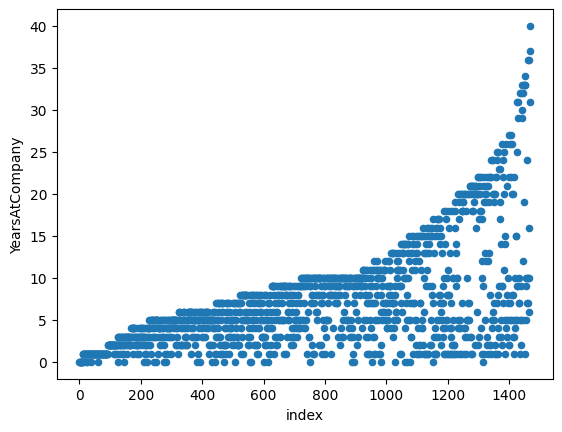

In [12]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

### ✅ Which one to use? `reset_index()` or `.index`

* If your index is meaningful (e.g., Employee IDs), use `reset_index()`.

* If you just need the current index for plotting but don’t want to alter the structure, use `attrition_pop.index`.

### Instructions 2/3 - Shuffle and re-plot

To determine whether **systematic sampling** introduces bias due to row order, you'll now **randomly shuffle** the dataset and compare the new scatter plot to the previous one.

---

**Steps:**

1. Randomly shuffle the rows of `attrition_pop` using `.sample(frac=1)`.
2. Reset the index of the shuffled DataFrame to ensure clean indexing.
3. Add an `index` column to the shuffled DataFrame for plotting.
4. Create a scatter plot of `YearsAtCompany` vs. the new index.


In [9]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

In [10]:
# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

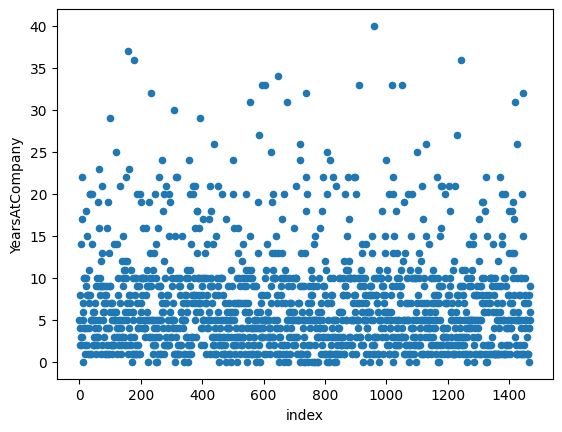

In [11]:
# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

### Instructions (3/3) - Question

Does a systematic sample always produce a sample similar to a simple random sample?

---

**Possible answers**

- Yes. All sampling (random or non-random) methods will lead us to similar results.  
- Yes. We should always expect a representative sample for both systematic and simple random sampling.  
- No. This only holds if a seed has been set for both processes.  
- **No. This is not true if the data is sorted in some way.** ✅  


## Well done! 🎉

You've just learned that **systematic sampling** can be problematic **when the dataset is sorted or contains a pattern**. In such cases, the sample may not be representative of the population.

👉 Key takeaway:  

To avoid bias, **shuffle the data** before applying systematic sampling. Once shuffled, **systematic sampling behaves just like simple random sampling**.

Keep up the great work — your sampling skills are solid! 💪

### Big question

>How to shuffled?
  * using `.sample(frac=1)` method:
    * `frac` stands for "fraction".
    * `frac=1` means you're sampling 100% of the data — all the rows — but in random order.
    * It's the standard way to shuffle a DataFrame.



>How shuffled works?

>What happend after Shuffeld?

## Stratified and weighted random sampling
